In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banking-dataset-marketing-targets/train.csv
/kaggle/input/banking-dataset-marketing-targets/test.csv


# Basic data check and understanding

In [2]:
df_train = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/train.csv')
df_test = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/test.csv')

In [3]:
df_train.head(4)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."


**Since dataset is not in proper format and delimiter here is semicolon(;), we have to use deimiter while loading data**

In [4]:
df_train = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/train.csv',delimiter = ';', quotechar='"')

df_train.head(4)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


The above output can be explained as:

Explaination given for 1st row:

**A 58-year-old married client working in management with a tertiary education level, no credit default, a balance of 2143, a housing loan, no personal loan, and was contacted via an unknown communication type on May 5th. The contact lasted 261 seconds, and this was the first contact in this campaign. They were not contacted in previous campaigns (pdays = -1). The outcome of the previous campaign is unknown, and the client did not subscribe to the term deposit (y = no).**



In [5]:
df_test = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/test.csv', delimiter = ';', quotechar='"')

df_test.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


**Analyse the both dataset**
We will check dtypes, null values and unique values

In [6]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df_train.shape

(45211, 17)

# EDA And Visualization to have better understanding of data

**RELATIONSHIP BETWEEN AGE AND SUBSCRIPTION**

/tmp/ipykernel_160/4061507557.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_train.groupby(['age_group', 'y']).size().unstack(fill_value=0)


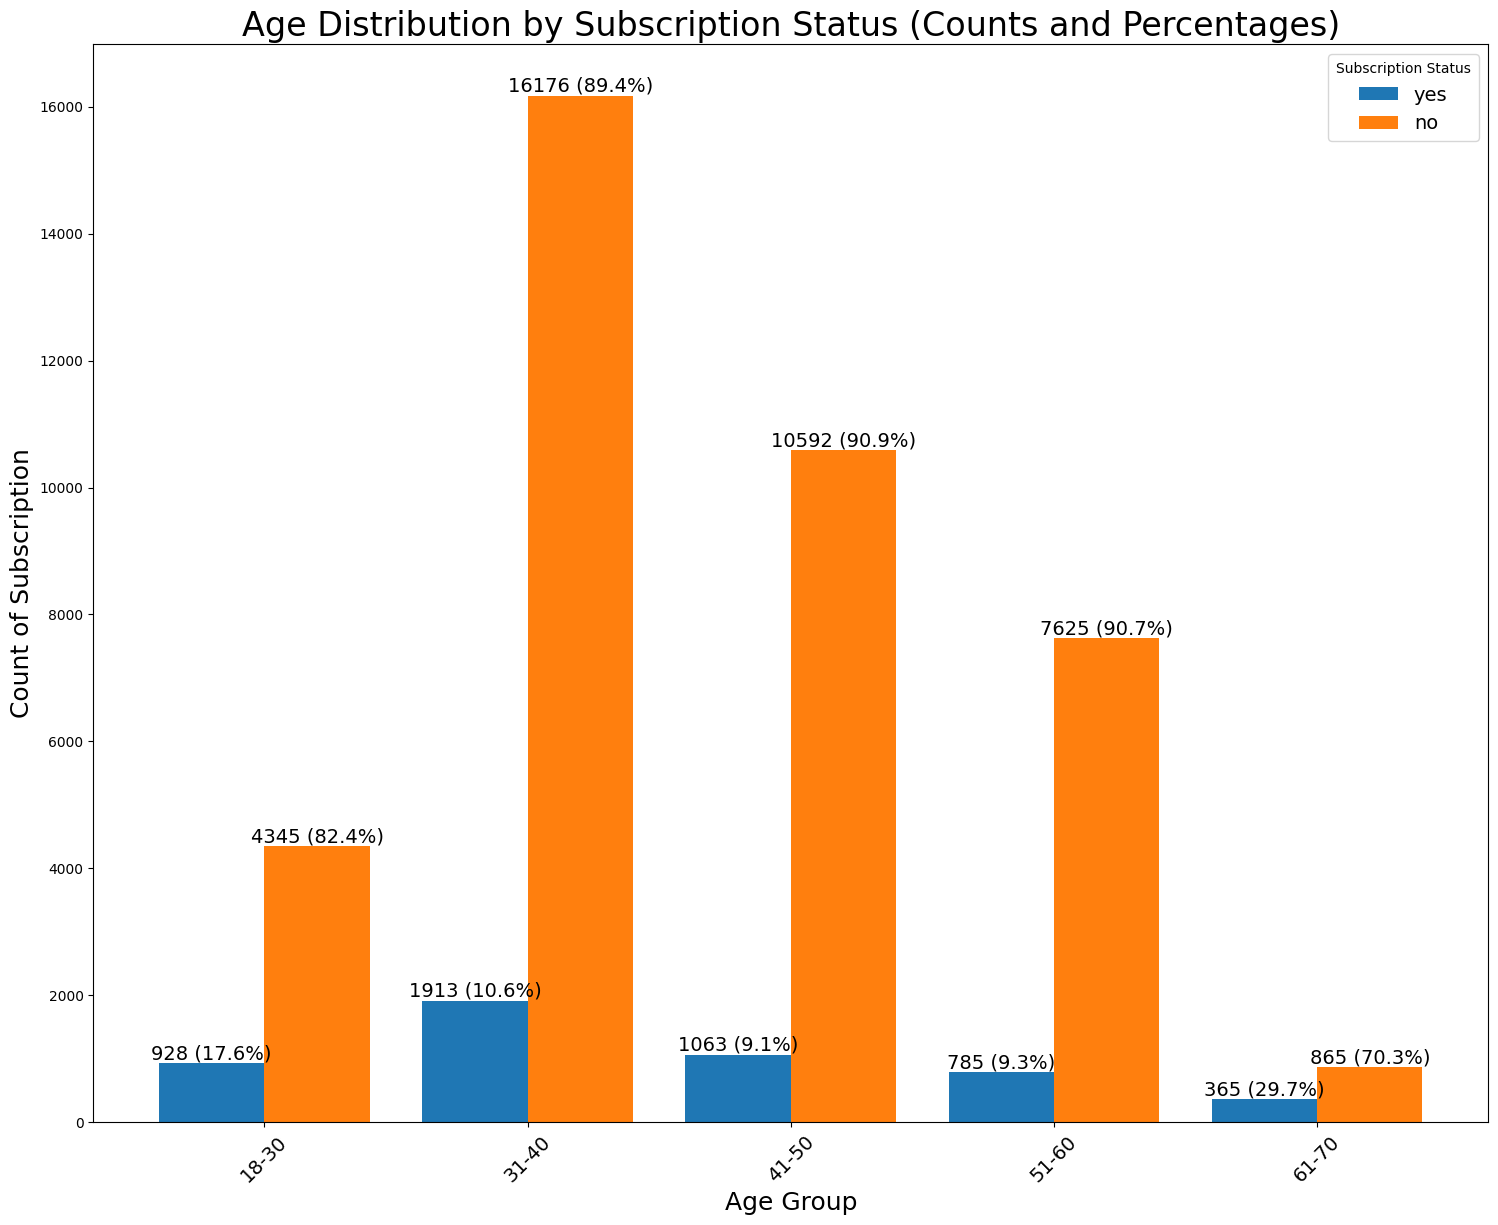

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create age bins and categorize ages
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70']
df_train['age_group'] = pd.cut(df_train['age'], bins=bins, labels=labels, right=False)


age_group_counts = df_train.groupby(['age_group', 'y']).size().unstack(fill_value=0)

age_group_counts['Total'] = age_group_counts.sum(axis=1)

# Create a bar plot
fig, ax = plt.subplots(figsize=(18, 14))
age_group_counts[['yes', 'no']].plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'], width=0.8)

plt.title('Age Distribution by Subscription Status (Counts and Percentages)', fontsize=24)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Count of Subscription', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title='Subscription Status', fontsize=14)

# Annotate counts and percentages on top of the bars
for i in range(len(age_group_counts)):
    count_yes = age_group_counts['yes'].iloc[i]
    count_no = age_group_counts['no'].iloc[i]
    total = age_group_counts['Total'].iloc[i]
    
    yes_percentage = (count_yes / total) * 100 if total > 0 else 0
    no_percentage = (count_no / total) * 100 if total > 0 else 0
    
    # Set annotation positions
    ax.annotate(f'{count_yes} ({yes_percentage:.1f}%)', 
                (i - 0.2, count_yes + 0.5), ha='center', va='bottom', fontsize=14)  # Yes count
    ax.annotate(f'{count_no} ({no_percentage:.1f}%)', 
                (i + 0.2, count_no + 0.5), ha='center', va='bottom', fontsize=14)  # No count

plt.show()


**The above data show people in age group of 18-30 and 61-70 are more inclined towards making deposits and thus subscribe to campaign, people from other age group may be investing in some other financial products/schemes decision on which can be made after due analysis**

**Subscription count by job type**

/tmp/ipykernel_160/2069845683.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_counts = df_train.groupby(['job', 'y']).size().unstack(fill_value=0)


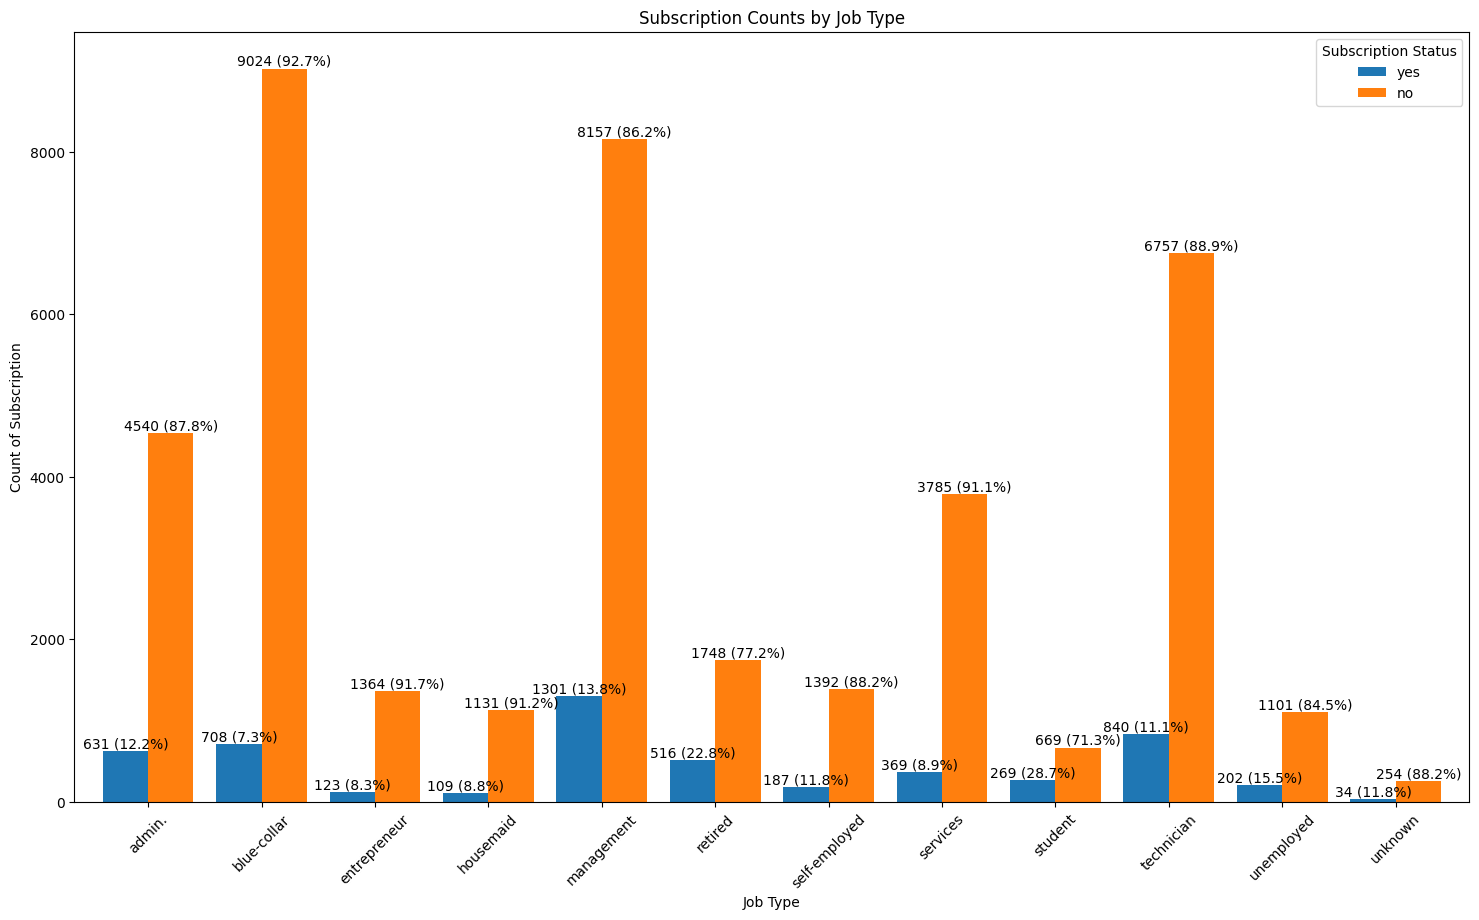

In [11]:

df_train['y'] = df_train['y'].astype('category')

# Group by job type and subscription status
job_counts = df_train.groupby(['job', 'y']).size().unstack(fill_value=0)

# Calculate total counts for percentage calculation
job_counts['Total'] = job_counts.sum(axis=1)

# Create a side-by-side bar graph
fig, ax = plt.subplots(figsize=(18, 10))

# Plotting counts
job_counts[['yes', 'no']].plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'], width=0.8)

# Adding titles and labels
plt.title('Subscription Counts by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count of Subscription')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Subscription Status')

# Annotate counts and percentages on top of the bars
for i in range(len(job_counts)):
    count_yes = job_counts['yes'].iloc[i]
    count_no = job_counts['no'].iloc[i]
    total = job_counts['Total'].iloc[i]
    yes_percentage = (count_yes / total) * 100 if total > 0 else 0
    no_percentage = (count_no / total) * 100 if total > 0 else 0
    
    # Set annotation positions
    ax.annotate(f'{count_yes} ({yes_percentage:.1f}%)', 
                (i - 0.2, count_yes + 0.5), ha='center', va='bottom')  # Adjust Y position
    ax.annotate(f'{count_no} ({no_percentage:.1f}%)', 
                (i + 0.2, count_no + 0.5), ha='center', va='bottom')  # Adjust Y position

plt.show()

**Age vs. Balance: Scatter plot to see the relationship between age and balance**

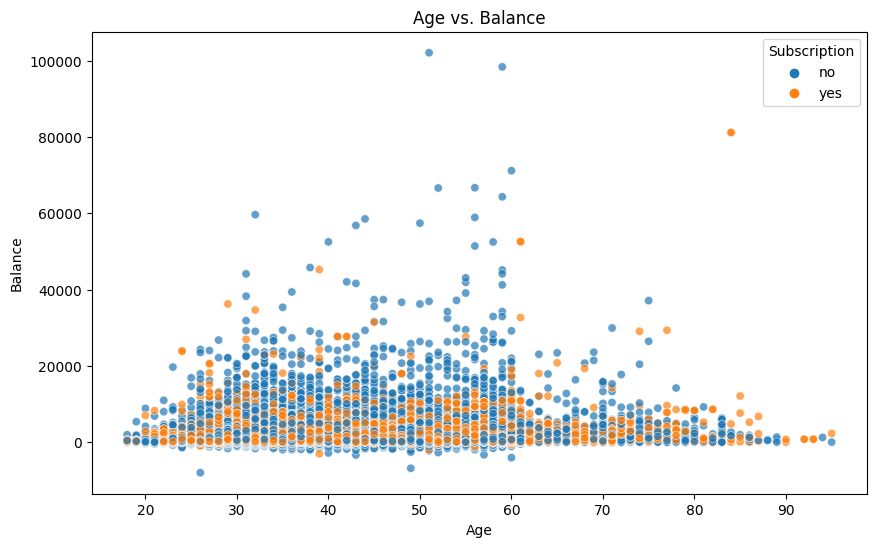

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='age', y='balance', hue='y', alpha=0.7)
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Subscription')
plt.show()


**Cross-tabulation and heatmap to show subscription rates based on marital status.**

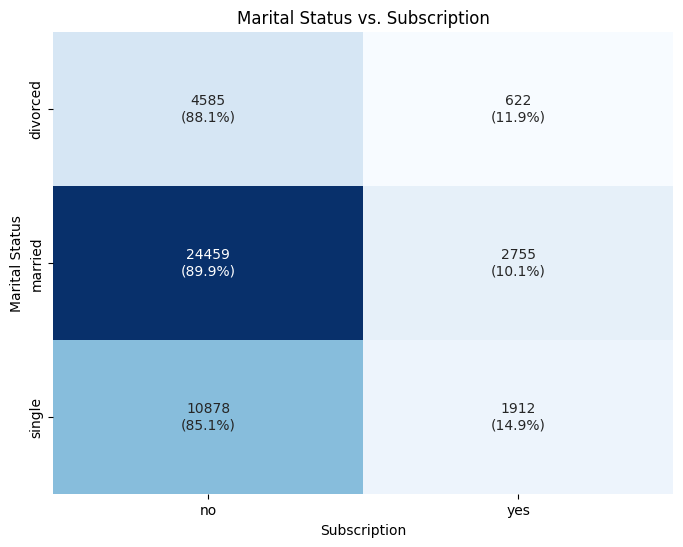

In [13]:
# Create a crosstab of marital status vs. subscription
marital_subscription = pd.crosstab(df_train['marital'], df_train['y'])

# Calculate percentages
marital_percentage = marital_subscription.div(marital_subscription.sum(axis=1), axis=0) * 100

# Combine counts and percentages 
annotations = marital_subscription.astype(str) + "\n(" + marital_percentage.round(1).astype(str) + "%)"


plt.figure(figsize=(8, 6))
sns.heatmap(marital_subscription, annot=annotations, cmap='Blues', fmt='', cbar=False)
plt.title('Marital Status vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Marital Status')
plt.show()


**From above data, it is feasible to draw a conclusion whether relationship status is not much influencing the subscription result of the campaign**

**CAMPAIGN VS SUBSCRIPTION COMPARISON**

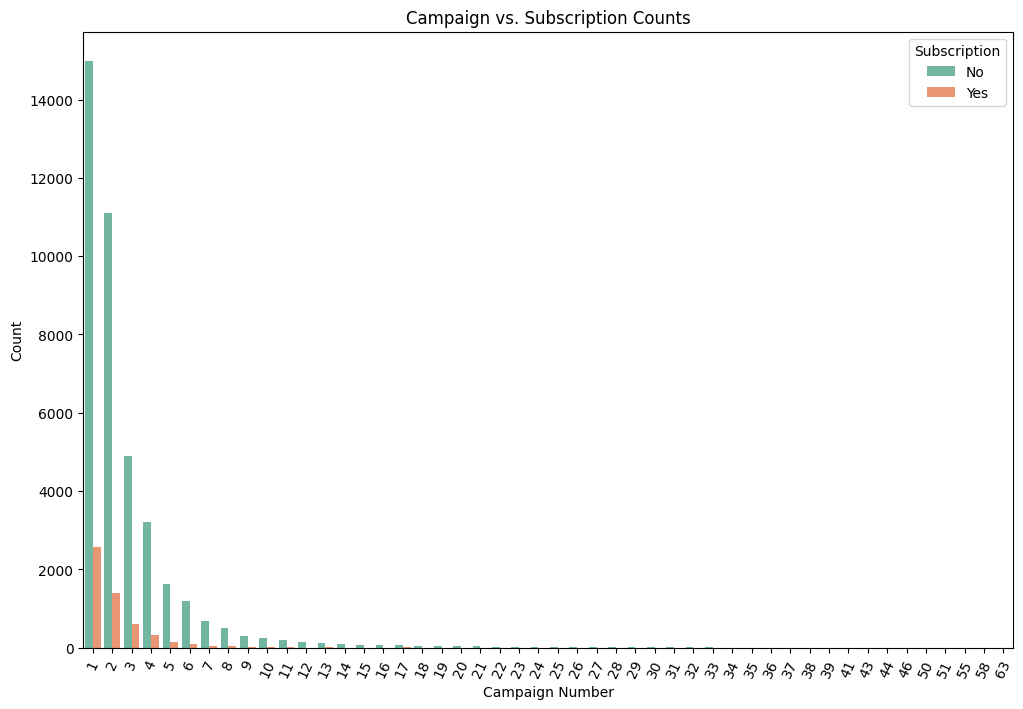

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_train, x='campaign', hue='y', palette='Set2')
plt.title('Campaign vs. Subscription Counts')
plt.xlabel('Campaign Number')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.show()

**The above graph shows that subscription decreases with each passing campaign**

**SUBSCRIPTION STATUS BASIS THE PREVIOUS CAMPAIGN OUTCOME.**

y            no   yes
poutcome             
failure    4283   618
other      1533   307
success     533   978
unknown   33573  3386
y            no   yes  subscription_rate
poutcome                                
failure    4283   618           0.126097
other      1533   307           0.166848
success     533   978           0.647253
unknown   33573  3386           0.091615


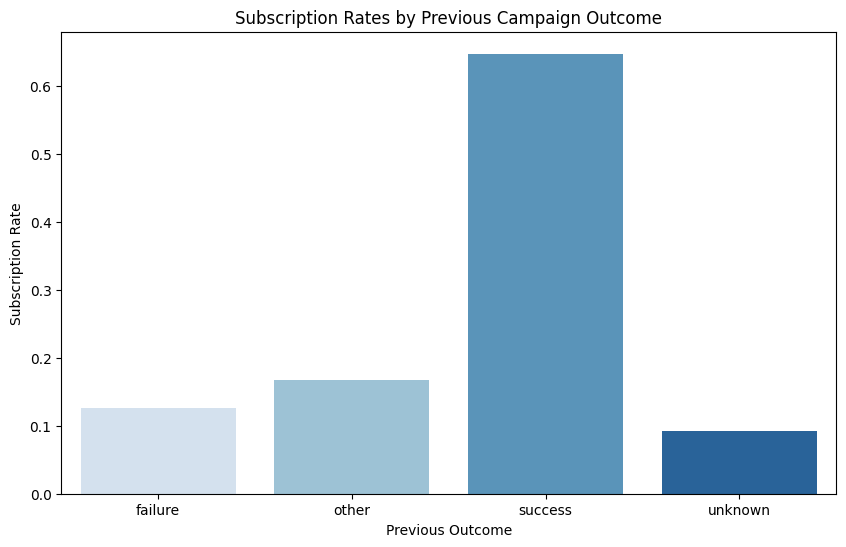

In [15]:
poutcome_subscription = pd.crosstab(df_train['poutcome'], df_train['y'])
print(poutcome_subscription)

# Calculate subscription rates
poutcome_subscription['subscription_rate'] = poutcome_subscription['yes'] / (poutcome_subscription['yes'] + poutcome_subscription['no'])
print(poutcome_subscription)

plt.figure(figsize=(10, 6))
sns.barplot(x=poutcome_subscription.index, y='subscription_rate', data=poutcome_subscription, palette='Blues')
plt.title('Subscription Rates by Previous Campaign Outcome')
plt.xlabel('Previous Outcome')
plt.ylabel('Subscription Rate')
plt.show()


**The above graph shows that subscription rate is highest among cases where previous outcome was also success thus bank should focus more on customer who had previously subscribed to its campaign.** 

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


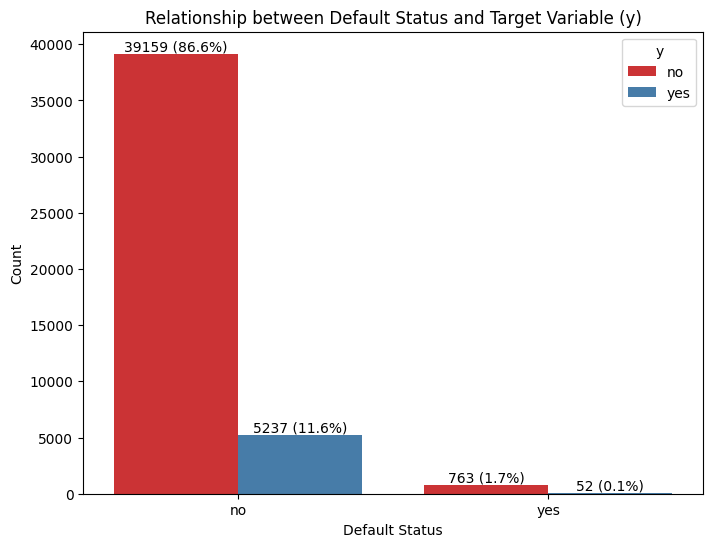

In [16]:
# Ensure 'default' and 'y' are treated as categorical
df_train['default'] = df_train['default'].astype('category')
df_train['y'] = df_train['y'].astype('category')

# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_train, x='default', hue='y', palette='Set1')

# Adding titles and labels
plt.title('Relationship between Default Status and Target Variable (y)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.legend(title='y', loc='upper right')

# Total counts for percentage calculation
total_count = len(df_train)

# Annotate counts and percentages on top of the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = (count / total_count) * 100
    ax.annotate(f'{count} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#  Convert non-numeric columns to categorical 
for col in df_train.select_dtypes(include='object').columns:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

df_combined = pd.concat([df_train, df_test], ignore_index=True)
df_combined_encoded = pd.get_dummies(df_combined, drop_first=True)

# Separate the combined data back into train and test sets
df_train_encoded = df_combined_encoded.iloc[:len(df_train)]
df_test_encoded = df_combined_encoded.iloc[len(df_train):]

#  Split the data into features (X) and target variable (y)
X_train = df_train_encoded.drop(columns='y_yes')  
y_train = df_train_encoded['y_yes']
X_test = df_test_encoded.drop(columns='y_yes')
y_test = df_test_encoded['y_yes']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train and evaluate Logistic Regression Model
logistic_model = LogisticRegression(max_iter=2000)  # Increased max_iter
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Train and evaluate SVM Model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Print classification report and confusion matrix for both models
def print_classification_report(y_test, y_pred, model_name):
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

#  Print reports for both models
print_classification_report(y_test, y_pred_logistic, "Logistic Regression")
print_classification_report(y_test, y_pred_svm, "SVM")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      4000
        True       0.63      0.41      0.50       521

    accuracy                           0.90      4521
   macro avg       0.78      0.69      0.72      4521
weighted avg       0.89      0.90      0.90      4521

Confusion Matrix:
[[3874  126]
 [ 305  216]]
SVM Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.99      0.96      4000
        True       0.80      0.39      0.53       521

    accuracy                           0.92      4521
   macro avg       0.86      0.69      0.74      4521
weighted avg       0.91      0.92      0.91      4521

Confusion Matrix:
[[3949   51]
 [ 316  205]]


# Improvement in marketing due to Modeling

**Combined Baseline Conversion Rate**

In [18]:
# Combine the training and test datasets
df_combined = pd.concat([df_train, df_test])

# Calculate baseline conversion rate
total_customers_combined = len(df_combined)
total_subscribers_combined = len(df_combined[df_combined['y'] == 'yes'])
baseline_conversion_rate_combined = (total_subscribers_combined / total_customers_combined) * 100

print(f"Combined Baseline Conversion Rate: {baseline_conversion_rate_combined:.2f}%")


Combined Baseline Conversion Rate: 11.68%


**Combined Conversion Rate**

In [19]:
df_test['y_actual'] = y_test.reset_index(drop=True)
df_test['y_pred_logistic'] = y_pred_logistic
df_test['y_pred_svm'] = y_pred_svm

predicted_subscribers_combined = df_test[(df_test['y_pred_logistic'] == 1) & (df_test['y_pred_svm'] == 1)]

actual_subscribers = predicted_subscribers_combined['y_actual'].sum()
new_conversion_rate_combined = (actual_subscribers / len(predicted_subscribers_combined)) * 100 if len(predicted_subscribers_combined) > 0 else 0

print(f"Combined New Conversion Rate: {new_conversion_rate_combined:.2f}%")


Combined New Conversion Rate: 78.80%


# Interpretation/Result

**1. The substantial increase from 11.68% to 78.80% demonstrates the effectiveness of using predictive modeling for customer targeting.**

**2. This improvement implies significant cost savings for the bank, as resources are now concentrated on high-potential leads, reducing the cost per acquisition and maximizing return on investment.**

